# DSML investigation:
### You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

### Your mission, should you choose to accept it, is to find that agent before any classified information gets stolen. Good luck!


## Assignment part one

Airport security confiscated a laptop of a spy, which was later given to you. The laptop contains some documents that might be useful in the investigation process. You retrieve those documents and want to analyse them. Our intelligence shows that the person that we are looking for has visited the USA between Sept 2019 to Oct 2020. He is currently working undercover.


### Getting to know our data

We have retrieved from the laptop the following file:
- A list of suspects
- The flight records of these potential suspects



In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
userRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/refs/heads/master/Assignements/Part%201/data/userRecords.csv")
travelRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/refs/heads/master/Assignements/Part%201/data/flightRecords.csv")

#### Shape of the data

Let's first check how many rows and columns (features) are in the user records

In [47]:
userRecords.shape

(957, 8)

**Q1. How many rows are there in the user records dataset?**


#### Check out the first few rows
Print the first few rows of the user records dataset and check them. Note that to protect innocent people, the name of the suspects have been censored, those will be revealed once number of potential suspects decreases.


In [48]:
userRecords.head(5)

,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,317991,Lu***,Al*****,29.07.03,AR,1,2.0,Web Designer
1,241892,Ma****,Ro*******,10.11.99,AR,1,0.0,Banker
2,303376,Fr****,Ac****,25.07.84,AR,1,0.0,Kitchen staff
3,761992,Fr****,Go***,20.03.70,AR,1,0.0,Teaching Assistant
4,373318,Jo***,Ro***,05.10.71,AR,1,0.0,Administrative employee


#### Column/feature names
print the list of columns in the user records dataset.

In [49]:
userRecords.columns

Index(['UserID', 'first_name', 'last_name', 'birthday', 'country',
       'marital_status', 'number_of_kids', 'employment'],
      dtype='object')

#### Duplicates
Check if there are any duplicate entries in the user records dataset.

__Remark__: If there are two rows in the dataset that have the same value for __all of the columns__, we consider this as a duplicate.

In [50]:
userRecords.duplicated().sum()

np.int64(3)

Show all the duplicated rows in the user records dataset.

__Hint:__ use the method `duplicated(keep=False)` to get all occurrences of the duplicated rows.

In [51]:
dup = userRecords[userRecords.duplicated(keep=False)]
dup


,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
18,100684,Ma*****,Me****,17.06.76,AR,NaN,0.0,Administrative employee
19,100684,Ma*****,Me****,17.06.76,AR,NaN,0.0,Administrative employee
47,910382,Ni***,El****,21.03.75,AZ,NaN,0.0,Administrative employee
165,910382,Ni***,El****,21.03.75,AZ,NaN,0.0,Administrative employee
276,610518,An*****,An******,15.02.53,DK,1,NaN,Manager
290,610518,An*****,An******,15.02.53,DK,1,NaN,Manager


**Q2. Are there any duplicate entries in the user records dataset?**

*Note: Duplicate entries refer to two or more rows where all the values across every column are identical.*

Yes, there's duplicate entries in the userRecords Dataset.

**Q3. How many duplicate entries are in the user records dataset?**

(Remark: for instance: there are 2 duplicate "entries" in the following list: '1 ,2, 1, 3, 3, 4, 5'. It's 1 and 3).

There's 3 different duplicates.

Drop the duplicate entries in the user records dataset.

In [52]:
userRecords.drop_duplicates(inplace=True)

### Spies often use false identities with fabricated data.

#### This suggests that if certain data points occur with statistically improbable frequency, they might be fabricated.

In this part we are going to verify if there are birthdates that have been reused an unusual amount of times.

Let's first ensure that the birthday column in the user records dataset has the correct format (datetime):


In [53]:
#Check the data type of each feature
userRecords.dtypes

,0
UserID,int64
first_name,object
last_name,object
birthday,object
country,object
marital_status,object
number_of_kids,float64
employment,object


Convert the column `birthday` to datetime if necessary

In [54]:
userRecords['birthday'] = pd.to_datetime(userRecords['birthday'])

/tmp/ipython-input-3110079980.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  userRecords['birthday'] = pd.to_datetime(userRecords['birthday'])


Find the list of birthdays that are duplicated/reused in the dataset

In [55]:
dup_birthday = userRecords[userRecords['birthday'].duplicated(keep=False)]

Let's count how many people have their birthday on the same day among the duplicated birthdays.

In [56]:
dup_birthday.groupby('birthday').size().sort_values(ascending=False)

,0
birthday,
1992-01-06,4
1975-01-28,2
1978-11-21,2
1983-03-15,2
1983-08-26,2
1991-02-12,2
1999-09-08,2
1999-12-09,2
2004-11-30,2


**Q4. What is the most common birthday in the dataset?**

It is 1992-01-06

**Q5. How many users have their birthdays on that day (the most common birthday)?**

3 users

We can consider that there is no suspicious discrepancy through birthdays.


#### We have reasons to believe that the suspect works very thoroughly, so he would make sure that the fabricated data about his identity is complete in order for his operation to run smoothly.
#### Therefore, we can exclude the people with incomplete information from the list of potential suspects.

Count how many null values are there in each column of the user records dataset. You can call `isnull()` and `sum()` to get a count of how many null values are there in each column.

In [57]:
userRecords.isnull().sum()

,0
UserID,0
first_name,1
last_name,1
birthday,1
country,0
marital_status,102
number_of_kids,152
employment,1


If you encounter any null values in the dataset, be sure to exclude those entries from the suspect list.

In [58]:
userRecords.dropna()

,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
1,241892,Ma****,Ro*******,1999-10-11,AR,1,0.0,Banker
2,303376,Fr****,Ac****,1984-07-25,AR,1,0.0,Kitchen staff
3,761992,Fr****,Go***,2070-03-20,AR,1,0.0,Teaching Assistant
4,373318,Jo***,Ro***,2071-05-10,AR,1,0.0,Administrative employee
...,...,...,...,...,...,...,...,...
950,458293,No********,Wi******,2054-03-26,ZA,1,2.0,Professor
952,218415,Bu******,Mo******,2001-01-22,ZA,0,1.0,Web Designer
953,173906,Th*****,Mo******,2061-06-11,ZA,0,2.0,Web Designer
954,178685,Mi*****,Bu*******,2053-05-29,ZA,0,1.0,Professor


### Linking the user records to the flight records

We will now proceed to identify the users who were in the USA from Sept 1st, 2019 to Oct 31st, 2020.

We will merge the flight records with the user records in order to ensure that users who have been unsuspected in the previous step are not considered.

In [59]:
userRecords.head()

,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
1,241892,Ma****,Ro*******,1999-10-11,AR,1,0.0,Banker
2,303376,Fr****,Ac****,1984-07-25,AR,1,0.0,Kitchen staff
3,761992,Fr****,Go***,2070-03-20,AR,1,0.0,Teaching Assistant
4,373318,Jo***,Ro***,2071-05-10,AR,1,0.0,Administrative employee


In [60]:
travelRecords.rename(columns={'userID': 'UserID'}, inplace=True)
travelRecords.drop_duplicates(inplace=True)
travelRecords.dropna()
travelRecords.head()

,flightName,departure,destination,date,UserID
0,KX65826,AR,IT,20.01.10,317991
1,CL12336,IT,MT,16.06.10,317991
2,YN106988,MT,SE,08.05.11,317991
3,CB58289,SE,EE,08.11.11,317991
4,SX625101,EE,AZ,17.11.11,317991


[Merging](https://pandas.pydata.org/docs/user_guide/merging.html) the two datasets:

*Hint: Use the above questions to identify on what feature to merge the datasets*

The result should contain the features flightName, Departure, Arrival,  Date, UserID, first_name, last_name, etc.

In [61]:
generalRecords = pd.merge(travelRecords, userRecords, on='UserID')
generalRecords.head()


,flightName,departure,destination,date,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,KX65826,AR,IT,20.01.10,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
1,CL12336,IT,MT,16.06.10,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
2,YN106988,MT,SE,08.05.11,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
3,CB58289,SE,EE,08.11.11,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
4,SX625101,EE,AZ,17.11.11,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer


Remember, our suspect operates meticulously, ensuring that there are no null values in any entries.

In [62]:
generalRecords.dropna()

,flightName,departure,destination,date,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,KX65826,AR,IT,20.01.10,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
1,CL12336,IT,MT,16.06.10,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
2,YN106988,MT,SE,08.05.11,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
3,CB58289,SE,EE,08.11.11,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
4,SX625101,EE,AZ,17.11.11,317991,Lu***,Al*****,2003-07-29,AR,1,2.0,Web Designer
...,...,...,...,...,...,...,...,...,...,...,...,...
25366,IY61324,PL,ZA,01.09.20,200865,Si*******,Na****,2062-12-16,ZA,0,0.0,Web Designer
25367,JO46672,ZA,DZ,20.07.21,200865,Si*******,Na****,2062-12-16,ZA,0,0.0,Web Designer
25368,HX1014810,DZ,CR,22.01.22,200865,Si*******,Na****,2062-12-16,ZA,0,0.0,Web Designer
25369,DL869109,CR,GT,28.04.22,200865,Si*******,Na****,2062-12-16,ZA,0,0.0,Web Designer


Let's now identify the users who has **travelled to** the United States (US) between the 1st of september 2019 and the 31st of october 2020.

*Note that the travel date is not in datetime format.*

In [63]:
generalRecords['date'] = pd.to_datetime(generalRecords['date'])
suspects1 = generalRecords[(generalRecords['date'] >= '2019-09-01') & (generalRecords['date'] <= '2020-10-31') & (generalRecords['destination'] == 'US')]
suspects1['UserID'].nunique()

/tmp/ipython-input-3638721581.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  generalRecords['date'] = pd.to_datetime(generalRecords['date'])


56

**Q6. How many suspects travelled to the US between the 1st of September 2019 and the 31st of October 2020?**

56 suspects traveled to the US between these dates

**Q7. Which users are included in the remaining list of suspects who traveled to the US between the 1st of September 2019 and the 31st of October 2020?** Choose from the answers on Moodle.

In [64]:
suspects1['UserID'].unique()

array([468560, 255830, 291994, 919502, 861915, 561296, 226545, 627731,
       220420, 297653, 206269, 805237, 236456, 512432, 336775, 710764,
       267733, 348465, 429697, 412064, 649131, 481578, 434361, 804662,
       287607, 522432, 411537, 424791, 679196, 410319, 556033, 723305,
       825203, 856596, 139646, 628854, 762279, 638911, 785994, 642133,
       428951, 457865, 739104, 852352, 123699, 581969, 409055, 850103,
       707686, 942571, 300377, 539529, 570351, 321117, 748564, 866017])

## [Data visualisation ](https://pandas.pydata.org/docs/user_guide/visualization.html)

 Suisse Impossible Mission Force is happy with the result and would like to have some visual aid to make a profile of the potential suspects.

Let's create a pie chart to visualize the employment distribution among the suspects who traveled to US between September 1st, 2019, and October 31st, 2020.

<Axes: title={'center': 'Employment distribution'}, ylabel='count'>

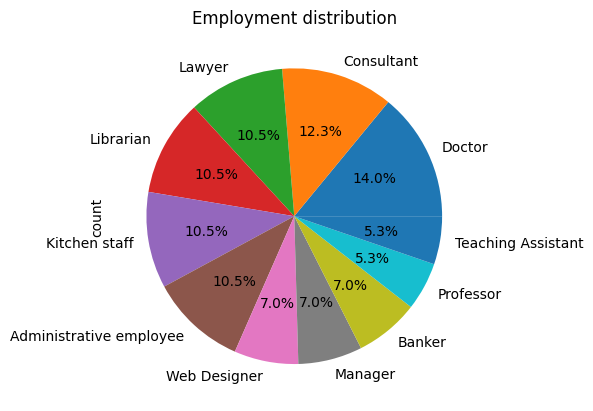

In [65]:
suspects1['employment'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Employment distribution")

**Q8. Which profession is the least represented among the suspects the suspects who traveled to US between September 1st, 2019, and October 31st, 2020?**
 Choose from the answers on Moodle.


The least represented profession is Teaching Assistant

## Journey length

The Suisse Impossible Mission Force suspects that the rogue agent is an anomaly within his declared employment category, particularly in terms of the number of days he spent at destinations compared to his peers.

To identify such deviations, we can employ boxplots for each employment category, allowing us to visually identify outliers in the data.

First, let's construct two tables: one for the dates of arrival and another for the dates of departure. Utilize the existing dataset to extract these dates based on the 'destination' and 'departure' columns. Ensure that both the arrival and departure dates are within the period the suspect is believed to have been in the US, which is from September 2019 to October 2020.

In [66]:
# For this step we will need the information not only about the fights to the US,
# but also about the flights taken from the US
arrivalUS = generalRecords[(generalRecords['date'] >= '2019-09-01') & (generalRecords['date'] <= '2020-10-31') & (generalRecords['destination'] == 'US')]
departureUS = generalRecords[(generalRecords['date'] >= '2019-09-01') & (generalRecords['date'] <= '2020-10-31') & (generalRecords['departure'] == 'US')]


We can keep on both of these tables the user ID, employment, and departure date / arrival date.

In [67]:
arrivalUS = arrivalUS[['UserID', 'employment', 'date']]
departureUS = departureUS[['UserID', 'employment', 'date']]

We can now join the two tables on user ID.

In [68]:
totalUS = pd.merge(arrivalUS, departureUS, on='UserID')
totalUS.head()

,UserID,employment_x,date_x,employment_y,date_y
0,255830,Professor,2020-10-04,Professor,2020-07-10
1,291994,Consultant,2020-04-06,Consultant,2020-06-25
2,919502,Banker,2020-02-19,Banker,2020-08-25
3,805237,Doctor,2019-12-31,Doctor,2020-08-21
4,236456,Doctor,2019-10-21,Doctor,2019-11-19


We can now create a new feature called journey_length representing the difference between departure date and arrival date.

*Hint: Ensure that the journey_length is in the right format*

In [69]:
totalUS['journey_length'] = pd.to_datetime(totalUS['date_y']) - pd.to_datetime(totalUS['date_x'])
totalUS['journey_length'] = totalUS['journey_length'].dt.days
totalUS.head()

,UserID,employment_x,date_x,employment_y,date_y,journey_length
0,255830,Professor,2020-10-04,Professor,2020-07-10,-86
1,291994,Consultant,2020-04-06,Consultant,2020-06-25,80
2,919502,Banker,2020-02-19,Banker,2020-08-25,188
3,805237,Doctor,2019-12-31,Doctor,2020-08-21,234
4,236456,Doctor,2019-10-21,Doctor,2019-11-19,29


*Sidenote: if you get negative journey length, what would be your explanation to that?*

He got out of the US and came back later. The others went to the US for a certain amount of time and left.

We can now create the boxplots where the x-axis represents each profession and the y-axis corresponds to the journey length.

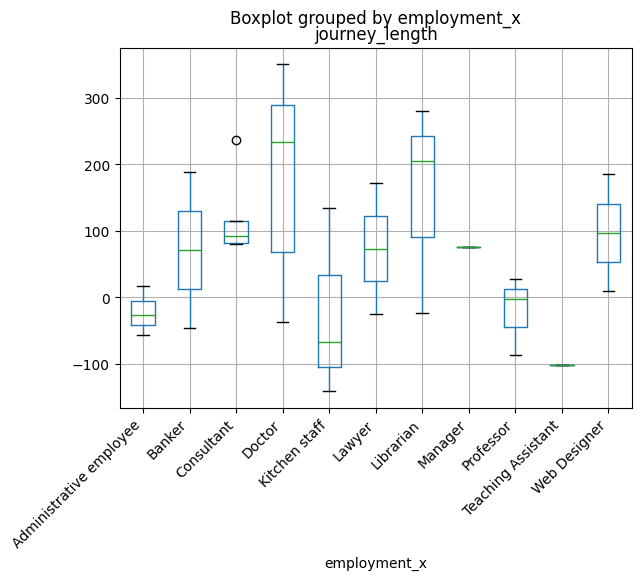

In [72]:
totalUS.boxplot(column='journey_length', by='employment_x')
plt.xticks(rotation=45, ha="right")
plt.show()

**Q9. Which profession has the most staggering outlier?**
(Meaning that the outlier value is the farthest away from the corresponding boxplot.)

Consultant


### SIMF is satisfied with your work but believes the current data is inconclusive.

Your investigation will continue when more intelligence comes in...

**Don't forget to complete the moodle quiz ([Assignment Q1](https://moodle.unil.ch/mod/quiz/view.php?id=1744562)) and submit your code ([Code Q1](https://moodle.unil.ch/mod/assign/view.php?id=1744563)) on Moodle before Monday 30.09.2024.**